# INST 126 – Introduction to Programming for Information Science
# HW: Pandas and Matplotlib

You'll need the file `Salaries.csv`, which contains data about 2008-09 nine-month academic salary for Assistant Professors, Associate Professors and Professors in a college in the U.S.. Make sure it's in the same directory as this python notebook. More info about the dataset is here: https://vincentarelbundock.github.io/Rdatasets/doc/carData/Salaries.html

## Exercise 1: Import the pandas library and read the dataset

Import the pandas library, then use the `read_csv()` function to read the `Salaries.csv` dataset, and put the resulting dataframe in the variable `salaries`. Print a quick summary of how many variables (and observations) are in the dataset, using the `.count()` dataframe method.

In [24]:
# Your code here
#get library and put in our workspace
import pandas as pd

#use a method from the library
salaries=pd.read_csv("Salaries.csv")

#counting dataset
salaries.count()

rank             400
discipline       400
yrs.since.phd    399
yrs.service      399
sex              399
salary           400
dtype: int64

"Pretty print" the first 25 rows of the dataframe using `.head()` method. You'll need to pass in 25 as a parameter to the `.head()` method.

In [27]:
# Your code here
import pandas as pd
rows=pd.read_csv("Salaries.csv")
rows.head(25)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19.0,18.0,Male,139750
1,Prof,B,20.0,16.0,Male,173200
2,AsstProf,B,4.0,3.0,Male,79750
3,Prof,B,45.0,39.0,Male,115000
4,Prof,B,40.0,41.0,Male,141500
5,AssocProf,B,6.0,6.0,Male,97000
6,Prof,B,30.0,23.0,Male,175000
7,Prof,B,45.0,45.0,Male,147765
8,Prof,B,21.0,20.0,Male,119250
9,Prof,B,18.0,18.0,Female,129000


### Exercise 2: Summarize the data
Get some quick stats with the `.describe()` method.

In [12]:
# Your code here
import pandas as pd
description=pd.read_csv("Salaries.csv")
description.describe()


,yrs.since.phd,yrs.service,salary
count,399.000000,399.000000,400.000000
mean,22.233083,17.601504,113538.660000
std,12.909360,12.987009,30253.387593
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107175.000000
75%,32.000000,26.500000,134046.250000
max,56.000000,60.000000,231545.000000


`.describe()` only gives you stats for quantitative values. Let's find out how many observations we have for the `rank` and `sex` variables.

First, use the `.value_counts()` method to get the count of each unique value in the **rank** column. Examples here: https://leportella.com/cheatlist/2017/11/22/pandas-cheat-list.html (documentation here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)

In [54]:
# Your code here
#df[column].value_counts()
import pandas as pd
df=pd.read_csv("Salaries.csv")
df["rank"].value_counts()


Prof         267
AsstProf      68
AssocProf     65
Name: rank, dtype: int64

Now, use the `.value_counts()` method to get the count of each unique value in the **sex** column.

In [55]:
## Your code here
#df[column].value_counts()
import pandas as pd
df=pd.read_csv("Salaries.csv")
df["sex"].value_counts()

Male      360
Female     39
Name: sex, dtype: int64

### Exercise 3: Remove rows with missing data
You need to use the `dropna()` method of a dataframe. More info here: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html

Drop all rows that have missing data in any of the columns. Assign the resulting dataframe to the variable `salaries_nonull`. Print the `.count()` summary of the dataframe to confirm that you've removed missing data (the counts should be the same for all columns)

In [40]:
# Your code here
#get library and put in our workspace
import pandas as pd

#use a method from the library
salaries_nonull=pd.read_csv("Salaries.csv")
salaries_nonull.dropna()
#counting dataset
salaries_nonull.count()

rank             400
discipline       400
yrs.since.phd    399
yrs.service      399
sex              399
salary           400
dtype: int64

### Exercise 4: Plot salary as a function of yrs.since.phd
Use the `.scatter()` function to make a scatterplot with `yrs.since.phd` on the x axis and `salary` on the y-axis. Make sure you use the `salaries_nonull` dataframe you made in the previous step.

Add "Salary vs. Yrs since PhD" as a title for the plot, and label the x-axis "Years since PhD" and the y-axis "Annual Salary". You'll need the `.title()`, `.xlabel()`, and `ylabel()` methods. (TIP: try using tab autocomplete to explore what methods you have with plt; to try this, type plt. then hit tab).

Text(0, 0.5, 'Annual Salary')

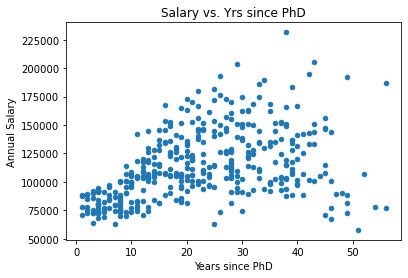

In [53]:
# import the matplotlib pyplot library as plt
import pandas as pd


# Your code here
salaries_nonull=pd.read_csv("Salaries.csv")
ax1=salaries_nonull.plot.scatter(x='yrs.since.phd',y='salary')

# # other code below here
plt.title("Salary vs. Yrs since PhD")
plt.xlabel("Years since PhD")
plt.ylabel("Annual Salary")



### Exercise 5: Summarize and plot the data by rank
Use the `groupby` function to summarize the data by the `rank` variable, set the parameter `as_index` to `False` (so we can use the grouping variable for plotting; more on this later), and make sure the data in each group is summarized by the mean of the values (by chaining it with the `.mean()` method. Google these methods/terms to find the docs! Assign the resulting dataframe to the variable `salaries_byRank`, then call the variable to display the dataframe.

In [64]:
# Your code here
# Your code here
#df[column].value_counts()
import pandas as pd
df=pd.read_csv("Salaries.csv")
salaries_byRank=df.groupby(by=["rank"],as_index=False).mean()
salaries_byRbarank.count()

rank             3
yrs.since.phd    3
yrs.service      3
salary           3
dtype: int64

Now use the `bar()` function from the matplotlib library to plot a bar graph of the average salary by rank. Docs here: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html

Add "Salary by Rank" as a title for the plot, and label the x-axis "Rank" and the y-axis "Annual Salary". You'll need the `.title()`, `.xlabel()`, and `ylabel()` methods.

Text(0, 0.5, 'Annual Salary')

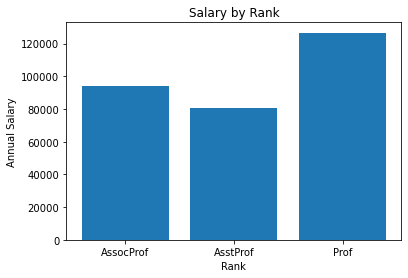

In [71]:

x = salaries_byRank['rank']
y = salaries_byRank['salary']
plt.bar(x, y)
# other code below here
import pandas as pd
df=pd.read_csv("Salaries.csv")
plt.title("Salary by Rank")
plt.xlabel("Rank")
plt.ylabel("Annual Salary")


### Exercise 6: Make the same plot (salaries by rank), but only for the "A" discipline, and then only for the "B" discipline
You'll make 2 dataframes, one filtered from `salaries_nonull` to only have rows where `discipline == A` (store the resulting dataframe in the variable `salaries_A`), and then one filtered from `salaries_nonull` to only have rows where `discipline == B` (store the resulting dataframe in the variable `salaries_B`). You can use the `.query()` or `.loc` methods, whichever you're more comfortable with.

After that, for each dataframe, you can do what you did in Exercise 5: use the `groupby` function to summarize the filtered dataframe by the `rank` variable, set the parameter `as_index` to `False` (so we can use the grouping variable for plotting; more on this later), and make sure the data in each group is summarized by the mean of the values (by chaining it with the `.mean()` method. Assign the resulting dataframes to `salaries_byRank_A` (and then `salaries_byRank_B` when you do this for the filtered dataframe with only the B discipline), then call the variable to display the dataframe. Then use the `bar()` function from the matplotlib library to plot a bar graph of the average salary by rank. Add "Salary by Rank (A discipline)" (or "Salary by Rank (B discipline)") as a title for the plot, and label the x-axis "Rank" and the y-axis "Annual Salary". You'll need the `.title()`, `.xlabel()`, and `ylabel()` methods.

First do this for the A discipline.

Text(0, 0.5, 'Annual Salary')

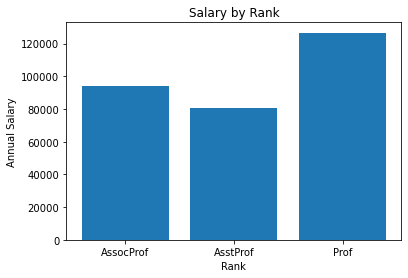

In [88]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt

salaries_nonull=pd.read_csv("Salaries.csv")
salaries_A=salaries_nonull.query("discipline == 'A'",inplace=False)
salaries_byRank_A=salaries_A.groupby(by=["rank"],as_index=False).mean()
salaries_byRank_A.count()
#Graphing
x = salaries_byRank['rank']
y = salaries_byRank['salary']
plt.bar(x, y)

plt.title("Salary by Rank")
plt.xlabel("Rank")
plt.ylabel("Annual Salary")



Then for the B discipline.

Text(0, 0.5, 'Annual Salary')

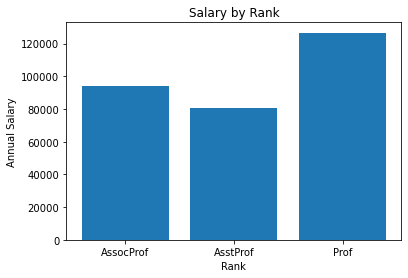

In [89]:
# Your code here
import pandas as pd

salaries_nonull=pd.read_csv("Salaries.csv")
salaries_B=salaries_nonull.query("discipline == 'B'",inplace=False)
salaries_byRank_B=salaries_B.groupby(by=["rank"],as_index=False).mean()
salaries_byRank_B.count()
#Graphing
x = salaries_byRank['rank']
y = salaries_byRank['salary']
plt.bar(x, y)

plt.title("Salary by Rank")
plt.xlabel("Rank")
plt.ylabel("Annual Salary")


